<a href="https://colab.research.google.com/github/Jasongiks/Cluster_Analysis_of_Wine_Variants/blob/main/Cluster_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform wine segmentation.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with clear boundaries.

### c) Understanding the Context 

Champagne Company is a leading wine company that specialises in the importation and
distribution of premium and super-premium wines, champagnes and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialised products and the ever-increasing tourism industry
where guests don ́t want to settle for less.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth',None)
%matplotlib inline

In [ ]:
df = pd.read_csv('https://bit.ly/2UBJERh')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# check dataset shape
df.shape

(178, 13)

In [ ]:
# chekc data types
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(178, 13)

No duplicates exist in our dataset

In [ ]:
# check for missing data
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no missing data in our dataset

## <font color='#2F4F4F'>3. Data Analysis</font>

In [ ]:
# get descriptive statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**What do you notice about the descriptive statistics, particularly the ranges? What does this tell you?** The ranges 25% and 75% have an almost equal deviation from the mean. This means our data is normally distributed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

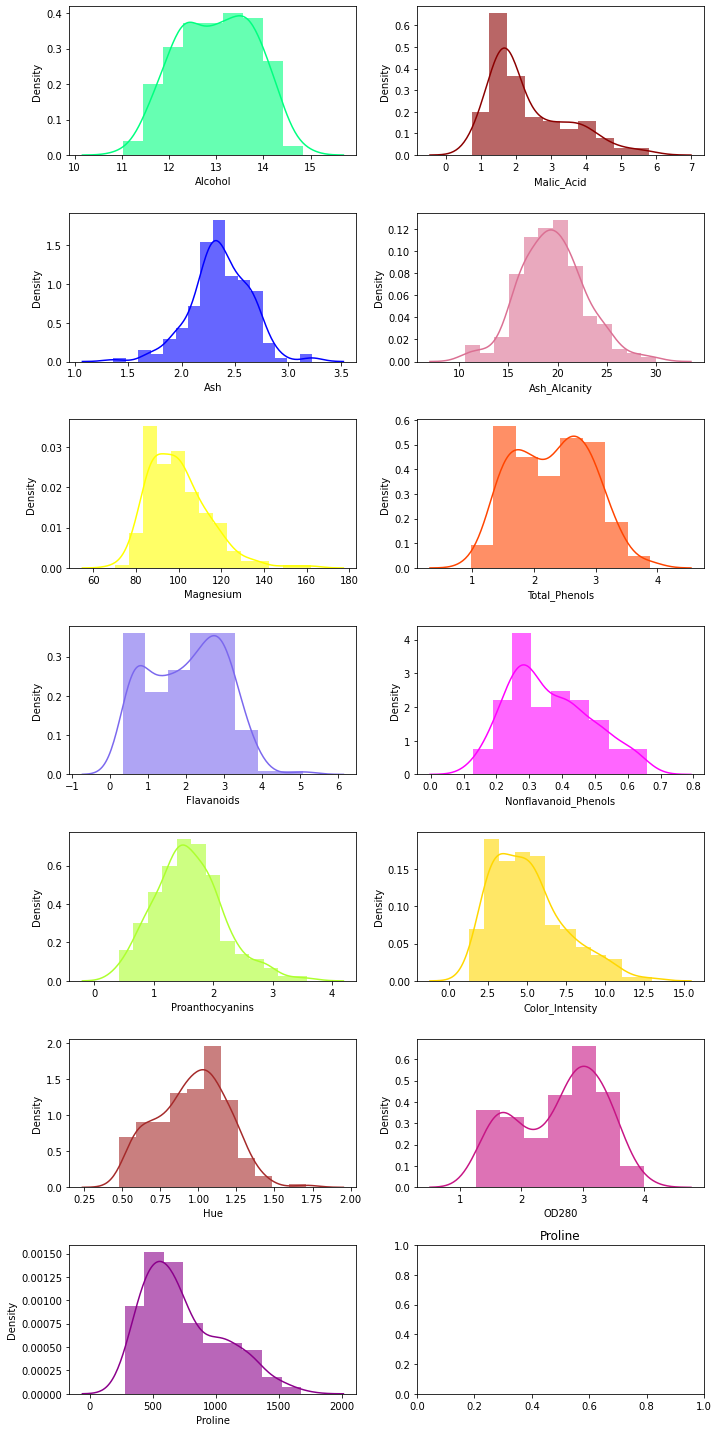

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

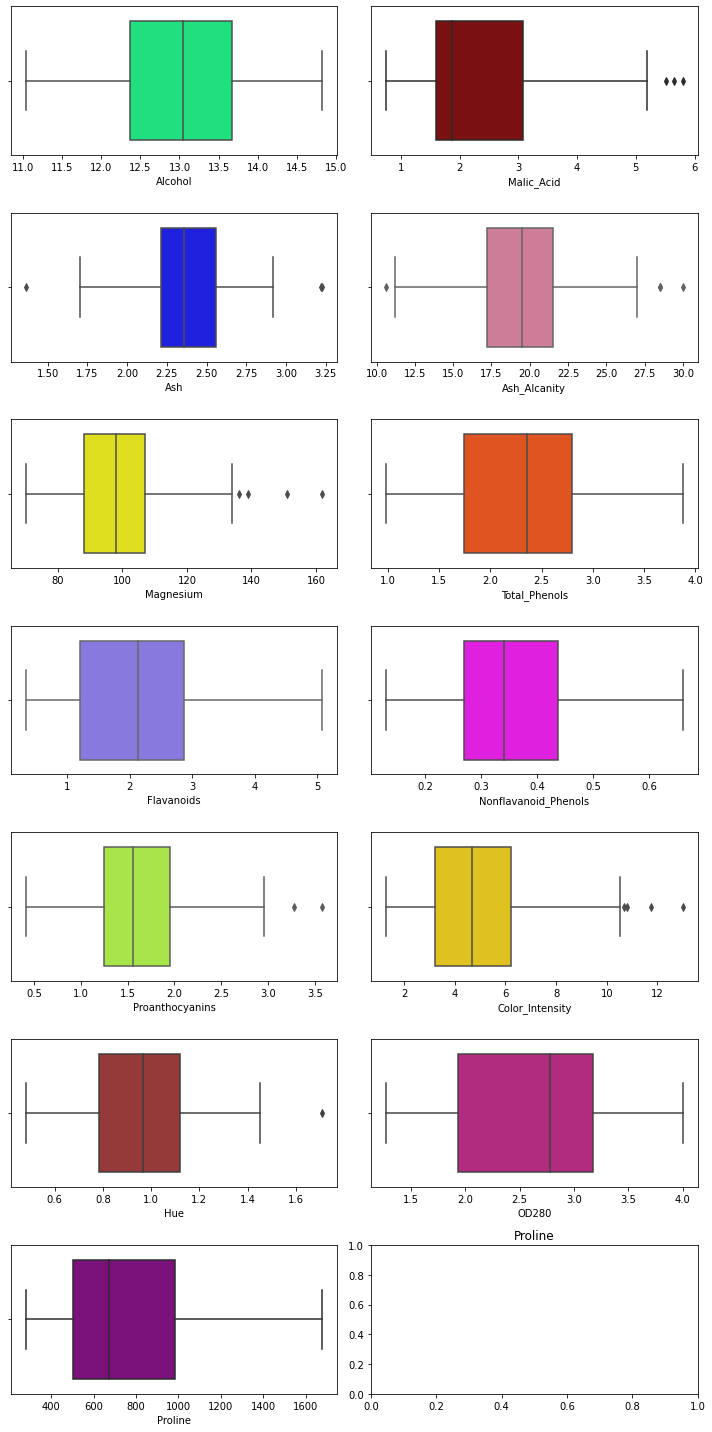

In [ ]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

**Provide your interpretations.**
1. Outliers exist in some of the variables in our dataset.

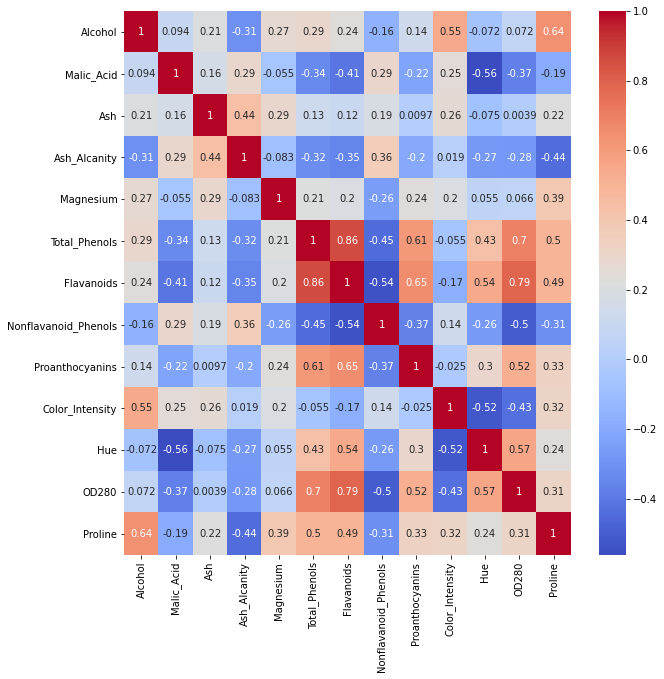

In [ ]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

**What do you notice?** 
1. There is a strong positive correlation between Total phenols and OD280.
2. There is a strong positive correlation between flavanoids and 0D280.
3. There is a strong positive correlation between Total phenols and flavanoids.

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# set all the features into X
X= df.iloc[:,]

In [ ]:
# scale our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit and transform our features
X = sc.fit_transform(X)

### 4.1 KMeans Clustering

In [ ]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

k_clusterer = KMeans(n_clusters = 5, random_state = 0)
k_clusterer.fit(X)
# getting the cluster labels
k_clusterer.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 0, 2, 4, 2,
       0, 0, 4, 0, 4, 2, 4, 3, 2, 0, 0, 4, 0, 2, 0, 0, 4, 1, 2, 0, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 3, 4, 0, 2, 2, 0, 0, 2, 0, 0, 4, 0, 4, 0, 2,
       2, 2, 4, 4, 4, 4, 0, 4, 1, 0, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

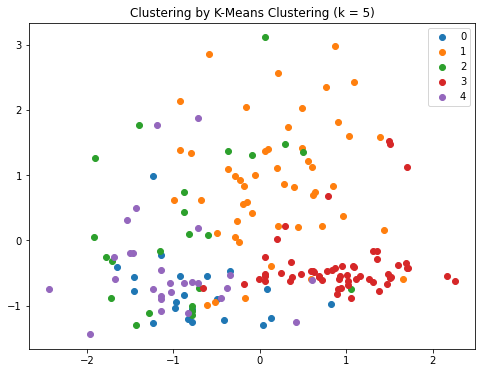

In [ ]:
# getting the KMeans scatter plot
kmeans_pred = k_clusterer.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)")
plt.legend()
plt.show()

In [ ]:
# getting the optimum value of k for our KMeans model using the Elbow Method
#first create a list that we will store our sum of squared errors
Error = []

#Let us test for K values between 1 an 10
k_range = range(2,12)

#Creating a for loop that will run the kmeans code for the dissrent values of K
for i in k_range:
  clusterer = KMeans(n_clusters=i, random_state=0)
  clusterer.fit(X)
  Error.append(clusterer.inertia_)


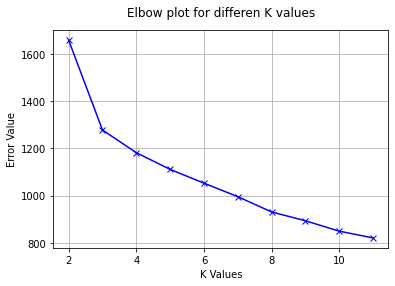

In [ ]:
# visualizing the distribution of errors per number of clusters
plt.plot(k_range,Error, 'bx-')
plt.title('Elbow plot for differen K values',pad = 14)
plt.xlabel('K Values')
plt.ylabel('Error Value')
plt.grid(True)
plt.show()

**From the above Elbow Method, what cluster number is ideal?** From the elbow plot above, the optimal number of clusters is 3. This is the elbow point of our graph.

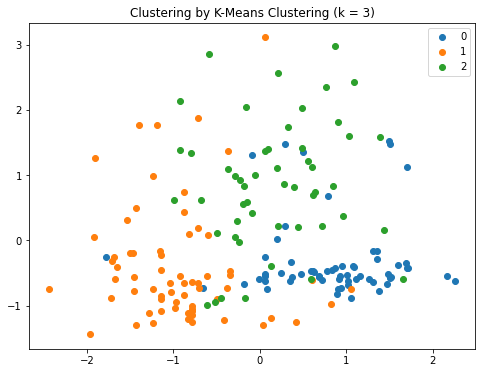

In [ ]:
# remodelling our clusters and visualising it
#remodelling
from sklearn.cluster import KMeans

k_clusterer = KMeans(n_clusters = 3, random_state = 0)
k_clusterer.fit(X)

#visualising
kmeans_pred = k_clusterer.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 3)")
plt.legend()
plt.show()

**Does the visualization of your model with the new value of k look better than the original one?** Yes it does.

In [ ]:
# add these cluster labels to our dataset
df['KMeans Cluster Group']=k_clusterer.predict(X)

# previewing a sample of our dataset
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans Cluster Group
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,1
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,1
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,1
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,1
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380,1
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0


### 4.2 Hierarchical Agglomerative Clustering

In [ ]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC

ag_clusterer = AC(n_clusters=5).fit(X)

# get the labels
ag_clusterer.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4])

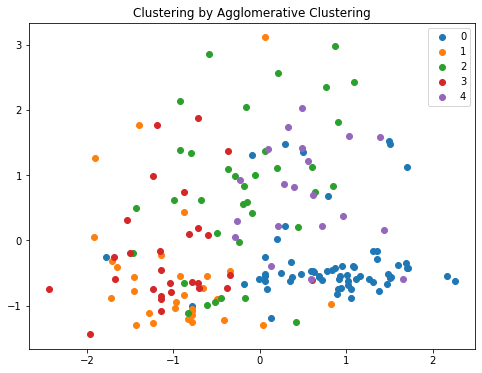

In [ ]:
# Creating a scatter plot of the cluster analysis
ag_pred = ag_clusterer.labels_
ag_clust = np.unique(ag_pred)

plt.figure(figsize = (8, 6))
for cluster in ag_clust:
    row_ix = np.where(ag_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by Agglomerative Clustering")
plt.legend()
plt.show()

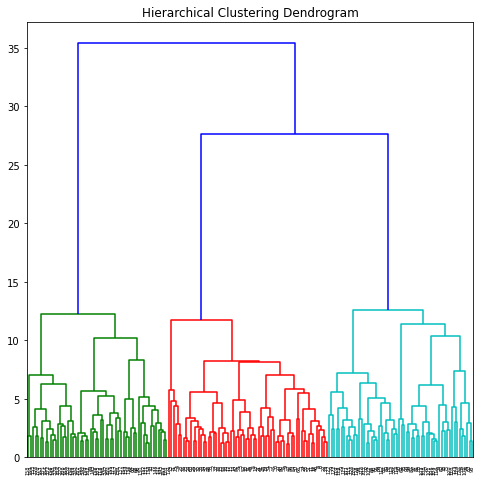

In [ ]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.figure(figsize=(8,8))
plt.title('Hierarchical Clustering Dendrogram')
dend=hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

**What an you deduce from the dendrogram?** If we were to draw a horizontal line that passes through longest distance without a horizontal line, our line would cut the blue line thrice. This means that 3 is the optimal no. of clusters.

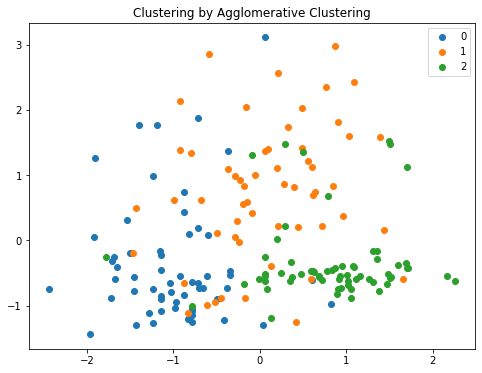

In [ ]:
# improve your agglomerative clustering model
ag_clusterer = AC(n_clusters=3).fit(X)

#visualising our model
ag_pred = ag_clusterer.labels_
ag_clust = np.unique(ag_pred)

plt.figure(figsize = (8, 6))
for cluster in ag_clust:
    row_ix = np.where(ag_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by Agglomerative Clustering")
plt.legend()
plt.show()

**Is your agglomerative model with a new value for k better than the first one?** Based on the data we have, the optimal number of clusters is 3. Since we are using 3 clusters in our new model, the model is therefore better than the first one. 

In [ ]:
# adding to our dataset
df['Agg_Cluster_Group']=ag_clusterer.fit_predict(X)

# previewing a sample of our dataset
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans Cluster Group,Agg_Cluster_Group
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,1,0
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,0,2
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0,2
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550,2,1
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,2,1
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,2,1
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,1,0
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,1,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,1
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,0,2


## <font color='#2F4F4F'>5. Summary of Findings</font>

1. There are 3 distinct clusters in our wine dataset.


## <font color='#2F4F4F'>6. Recommendations</font>

1. An analysis of the different wine clusters should be done to determine the highest quality wine that can satisfy the target market.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question? 
Yes. The question of determining the different wine clusters is the right one for the business.


#### b) Did we have the right data?
Yes. The data used was the appropriate data to use.

#### c) What can be done to improve the solution?
Outliers in the data set should be eliminated.